In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [116]:
l0  = tf.keras.layers.Dense(1,input_shape = (1,))
model = tf.keras.models.Sequential([l0])
model.compile(loss='mae', optimizer='adam',metrics=['mae'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [117]:
x = np.arange(100)
y = x * 2
history = model.fit(x,y,epochs=1000,verbose=0)


In [119]:
model.predict([10])

1/1 [==============================] - 0s 107ms/step


array([[22.338972]], dtype=float32)

In [111]:
l0.get_weights()

[array([[1.9998398]], dtype=float32), array([-0.00071135], dtype=float32)]

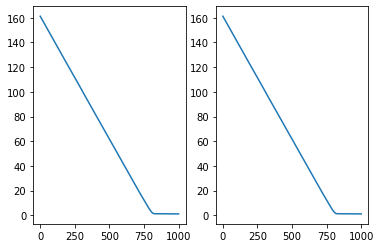

In [120]:
mae = history.history['mae']
loss = history.history['loss']
epoch = history.epoch
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(epoch,mae)
ax2.plot(epoch,loss)

### 这里显然出现问题了，学习率太小，我们可以手动调大，也可以写一个回调函数

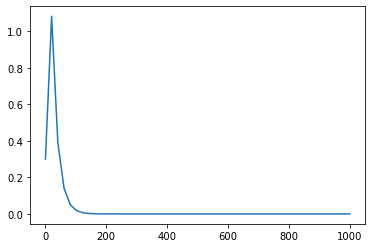

In [12]:
def scheduler(epoch,lr=0.3):
    import math
    if epoch < 10:
        return lr
    else:
        return math.exp(-epoch / 20) * 3


epoch = np.linspace(0,1000)
lr = [scheduler(i) for i in epoch]

plt.plot(epoch,lr)

Epoch 1/500
4/4 [==============================] - 1s 16ms/step - loss: 90.3881 - mae: 90.3881 - lr: 0.0100
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 11.8673 - mae: 11.8673 - lr: 0.0100
Epoch 3/500
4/4 [==============================] - 0s 39ms/step - loss: 10.5580 - mae: 10.5580 - lr: 0.0100
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 8.4040 - mae: 8.4040 - lr: 0.0100
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 9.8608 - mae: 9.8608 - lr: 0.0100
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 8.5894 - mae: 8.5894 - lr: 0.0100
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 11.7891 - mae: 11.7891 - lr: 0.0100
Epoch 8/500
4/4 [==============================] - 0s 6ms/step - loss: 8.7824 - mae: 8.7824 - lr: 0.0100
Epoch 9/500
4/4 [==============================] - 0s 7ms/step - loss: 11.3177 - mae: 11.3177 - lr: 0.0100
Epoch 10/500
4/4 [=========================

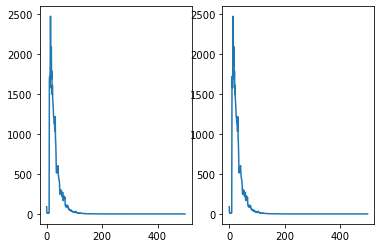

In [13]:
x = np.arange(100)
y = x * 2

l0 = tf.keras.layers.Dense(1,input_shape = (1,))
model = tf.keras.models.Sequential([l0])

def scheduler(epoch,lr):
    import math
    if epoch < 10:
        return lr
    else:
        return math.exp(-epoch / 20) * 3

scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


model.compile(loss = 'mae', optimizer = 'SGD', metrics = ['mae'])
history = model.fit(x,y,epochs =500,callbacks = [scheduler_callback])

mae = history.history['mae']
loss = history.history['loss']
epoch = history.epoch
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(epoch,mae)
ax2.plot(epoch,loss)


In [14]:
model.predict([56])

1/1 [==============================] - 1s 943ms/step


array([[112.00241]], dtype=float32)